# 6: Spectral Clustering

## 6.1: Spectral Clustering

Spectral Clustering works by transforming the data into a subspace prior to clustering. This is incredibly useful when the data is high dimensional. This saves the effort of doing a PCA or a dimensionality reduction ourselves prior to clustering. Spectral clustering works by determining an affinity matrix between the datasets. The data is represented as a graph and an affinity matrix is computed. For the affinity function, we can use the rbf kernel function or nearest neighbors.

Let us consider the intertwined circles with noise:

<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2017/06/20/make_circles_292Si2F.png'/>

<br/>
## Exercise:

 - Apply spectral clustering to the dataset with number of clusters as 2.
 - Assign the cluster labels to a dataframe, circles_df with column 'spectral'

/Users/harishkashyap/anaconda/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


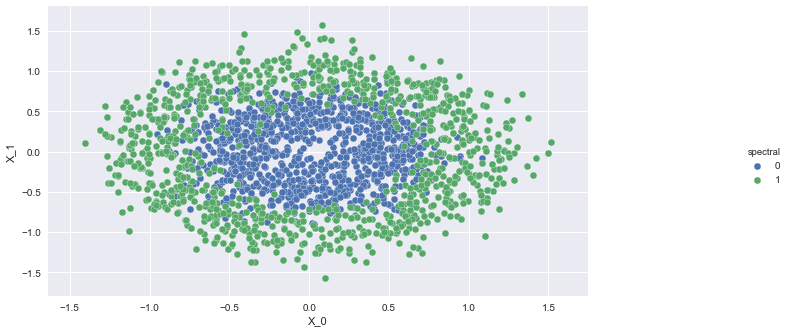

In [7]:
from sklearn.cluster import SpectralClustering
from sklearn import datasets
import pandas as pd
import seaborn as sns

N_Samples = 2000
X, y = datasets.make_circles(n_samples=N_Samples, factor=.5,  noise=.2)
noisy_circles = pd.DataFrame({'X_0':X[:,0],'X_1':X[:,1], 'y':y})

# Fit the spectral clustering to the dataset and plot the results.
spectral = SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")

noisy_circles.drop('y', 1)
spectral.fit(noisy_circles)
noisy_circles['spectral'] = spectral.labels_
g=sns.pairplot(x_vars="X_0", y_vars="X_1", hue = "spectral", data = noisy_circles)
g.fig.set_size_inches(14, 6)
sns.despine()
sns.plt.show()

# The Algorithm

* project your data to $R^{n}$
* Form an Affinity  matrix, using a Gaussian Kernel/Adjacency matrix:  
$$A_{i,j}=\delta_{i,j}$$
* Construct the Graph Laplacian from A
* Solve an Eigenvalue problem, such as $$L v=\lambda v$$ 
* Select k eigenvectors \{ v_{i}, i=1, k \}  corresponding to the k eigenvalues  $\{ \lambda_{i}, i=1, k \}$, to define a k-dimensional subspace $P^{t}LP$
* Compute clusters in this subspace using using k-means